# Imports

In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [4]:
#Load Sample Data and review content
dataset = pd.read_csv("root_cause_analysis.csv")

print("\nLoaded Data :\n------------------------------------")
print(dataset.head())


Loaded Data :
------------------------------------
   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


# Preprocessing

## Label Encoding of the output

In [5]:
label_encoder = LabelEncoder()
dataset['ROOT_CAUSE'] = label_encoder.fit_transform(dataset['ROOT_CAUSE'])
dataset.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,1
1,2,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,1,1,1
3,4,0,1,0,1,1,0,1,1
4,5,1,1,0,1,0,1,0,2


## Dropping Unnecessary Columns

In [9]:
dataset = dataset.drop("ID", axis = 1)
dataset

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,0,0,0,0,1,0,1,1
1,0,0,0,0,0,0,1,1
2,0,1,1,0,0,1,1,1
3,0,1,0,1,1,0,1,1
4,1,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1,0
996,0,0,0,1,0,0,0,2
997,1,1,1,0,0,0,0,1
998,0,1,1,1,1,0,0,2


## Converting the dataset into numpy array

In [19]:
# Converting the input into numpy array which is the preferred input format for keras
np_dataset = dataset.to_numpy().astype(float)

## Seperating input and output columns

In [20]:
X_data = np_dataset[:,0:len(np_dataset[0])-1]
Y_data = np_dataset[:,len(np_dataset[0])-1]

In [21]:
X_data[:5]

array([[0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0.]])

In [22]:
Y_data[:5]

array([1., 1., 1., 1., 2.])

In [23]:
# One hot encoding of the output
Y_data = tf.keras.utils.to_categorical(Y_data, 3)
Y_data[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

## Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(900, 7) (900, 3) (100, 7) (100, 3)


# Creating the deep learning model

In [25]:
NB_CLASSES = 3
N_HIDDEN = 128

model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        N_HIDDEN,
        input_shape = (7,),
        name="Hidden-Layer-1",
        activation='relu'

    )
)

# Adding the second hidden layer in the model
model.add(
    keras.layers.Dense(
        N_HIDDEN,
        name="Hidden-Layer-2",
        activation='relu'
    )
)

# Adding the output layer in the model
model.add(
    keras.layers.Dense(
        NB_CLASSES, #number of outputs
        name="Output-Layer",
        activation='softmax' #getting the probabilities of each output
    )
)

# Use of categorical_crossentropy loss function because it is a multi-class classification
model.compile(loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________


In [44]:
VERBOSE = 1 # Used to see the progress of the model
BATCH_SIZE = 64
EPOCHS = 20
VALIDATION_SPLIT = 0.2 # Setting the 20% of the training data for validation

# Training of the model
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
)

Epoch 1/20
12/12 [==============================] - 0s 14ms/step - loss: 0.2852 - accuracy: 0.8639 - val_loss: 0.3065 - val_accuracy: 0.8556
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2834 - accuracy: 0.8694 - val_loss: 0.2949 - val_accuracy: 0.8722
Epoch 3/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2867 - accuracy: 0.8597 - val_loss: 0.3449 - val_accuracy: 0.8444
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.8639 - val_loss: 0.2793 - val_accuracy: 0.8889
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2814 - accuracy: 0.8625 - val_loss: 0.2786 - val_accuracy: 0.8833
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.2852 - accuracy: 0.8667 - val_loss: 0.2942 - val_accuracy: 0.8556
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.8625 - val_loss: 0.3142 - val_accuracy: 0.8611
Epoch 8/20
12/12 [=

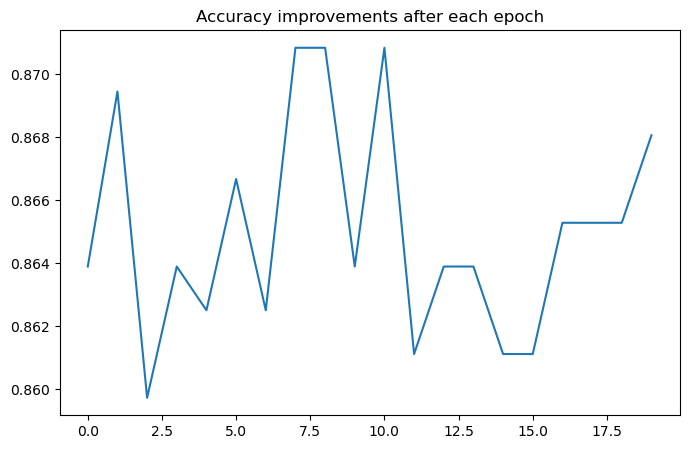

In [45]:
# Plot the accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements after each epoch")
plt.show()

In [46]:
# Evaluation of teh model on test data
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.4842 - accuracy: 0.8200


[0.484200656414032, 0.8199999928474426]

In [47]:
CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1 )

print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 223ms/step
['DATABASE_ISSUE']


In [48]:
#Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(
        model.predict([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis=1 )))

1/1 [==============================] - 0s 72ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
